In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=30023730f208d5a534ae478022f04945e5e4f31f6b8571cad30d00cbcfd12819
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [1]:
import os

os.environ["SPARK_HOME"] = "/usr/local/lib/python3.10/dist-packages/pyspark"
os.environ["HADOOP_HOME"] = "C:/winutils"

from pyspark import SparkContext
sc = SparkContext('local')

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

ModuleNotFoundError: ignored

In [ ]:
KCDPFinal = sqlContext.read.csv("/content/drive/MyDrive/DBMS_project_final/Source Code/1-Datasets/KCPD_Crime_Data/KCcrime2010To2018.csv", inferSchema = True, header = True)
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DBMS_project_final/Source Code/1-Datasets/KCPD_Crime_Data/KCcrime2010To2018.csv")

<ipython-input-4-ec9dc32b8e1e>:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/DBMS_project_final/Source Code/1-Datasets/KCPD_Crime_Data/KCcrime2010To2018.csv")


In [ ]:
KCDPFinal.createTempView(name = "kccrimes")
query1 = sqlContext.sql("select description, count(*) as count from kccrimes group by description")
query1.show()

+--------------------+-----+
|         description|count|
+--------------------+-----+
|      misc violation|   13|
|               FRAUD|    2|
|  stealing from auto|    2|
|     PROPERTY DAMAGE|    2|
|liquor law violation|    2|
|  stealing from bldg|    5|
|Prostitution/Solicit|  788|
|Possession/Sale/Dist|39608|
|Stealing from Buildi|47710|
|            misc off|    4|
|Accidental Drug Over|    5|
|Aggravated Assault (|49141|
|  misc investigation|    5|
|            Stalking|  148|
|Stealing Auto Parts/|51550|
|         Drunkenness|  831|
|  Family Disturbance|   80|
|      Statutory Rape|  717|
| Liquor Law Violaton| 2381|
|                   ]|    2|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#Save the output in csv file
query1.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-1.csv')

In [ ]:
import re
crime_list = []

for k in query1.select("description").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.description)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

244


In [ ]:
print(crime_list)

['misc violation', 'FRAUD', 'stealing from auto', 'PROPERTY DAMAGE', 'liquor law violation', 'stealing from bldg', 'Prostitution Solicit', 'Possession Sale Dist', 'Stealing from Buildi', 'misc off', 'Accidental Drug Over', 'Aggravated Assault', 'misc investigation', 'Stalking', 'Stealing Auto Parts', 'Drunkenness', 'Family Disturbance', 'Statutory Rape', 'Liquor Law Violaton', 'Stealing From Auto', 'Agg Assault Drive', 'Sex Offense others', 'Felony Eluding', 'Stealing from Auto', 'Intimidation', 'Forcible Sodomy', 'Agg Assault Dome', 'MISSING PERSON', 'Forged Checks', 'Family Offense', 'False Information to', 'Credit Debit ATM Car', 'Sexual Assault with', 'armed robbery', 'Failure to Return', 'Defrauding an Innkee', 'stealing shoplifting', 'burglary res', 'Intimidation DV', 'False ID', 'intimidation', 'Burglary Non Resid', 'credit debit atm car', 'Obstruction', 'Prostitution Patroni', 'Missing Runaway Juve', 'Intoxicated Street', 'Weapons Law Violatio', 'Peeping Tom', 'Stolen Idenity',

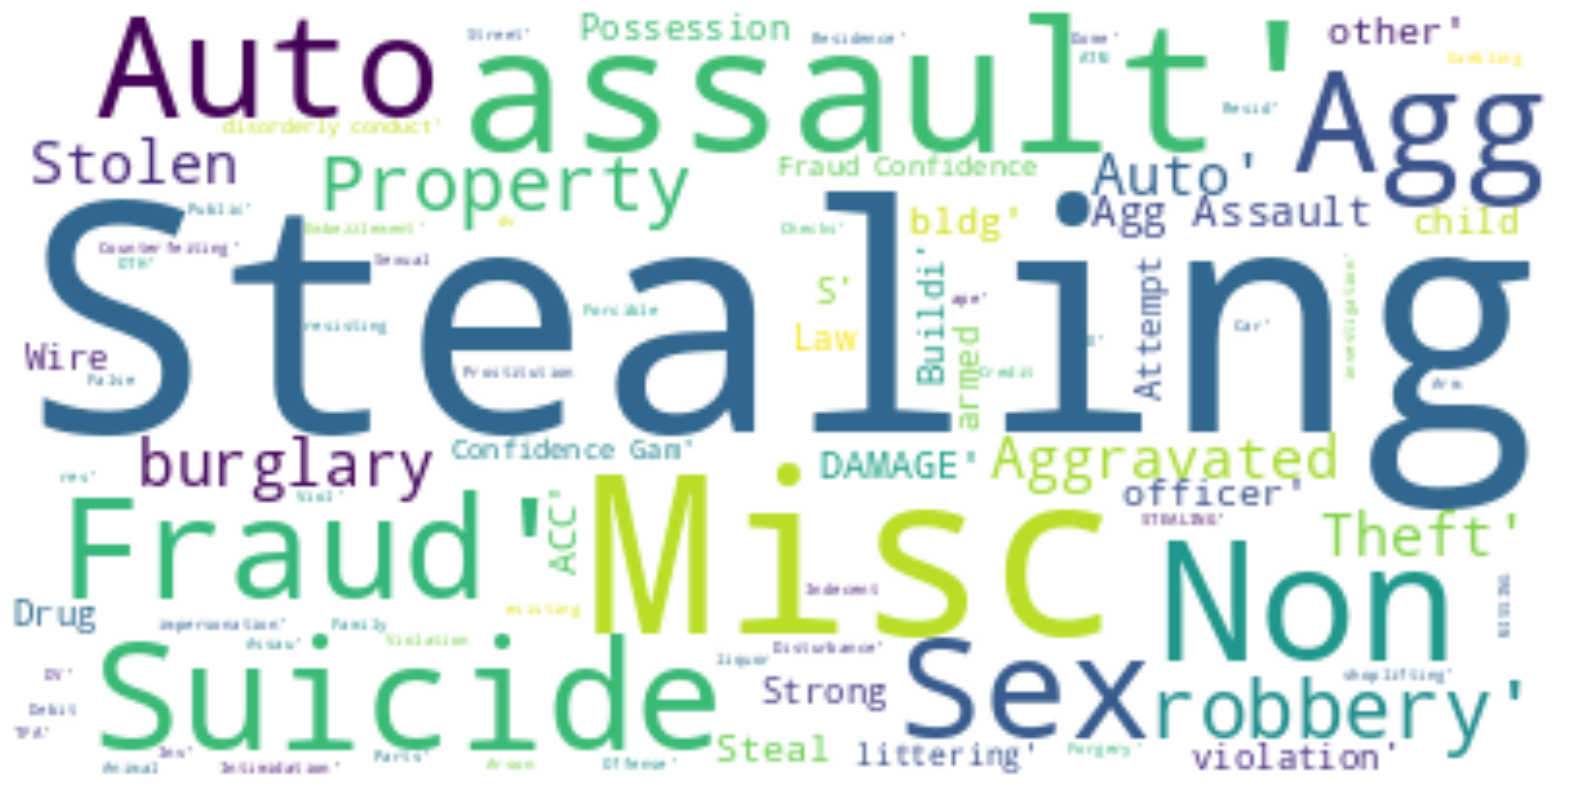

In [ ]:
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
q1_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-1.csv')

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size= 500, stopwords = stopwords, max_words=5000,contour_width=3, background_color="white").generate(str(crime_list))
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
query2o = sqlContext.sql("select Reported_year, Sex, count(*) as count from kccrimes where Sex RLIKE 'M|F|U' and Reported_year = '2013' group by Reported_year, Sex")
query2o.show()
query2t = sqlContext.sql("select Reported_year, Sex, count(*) as count from kccrimes where Sex RLIKE 'M|F|U' and Reported_year = '2016' group by Reported_year, Sex")
query2t.show()

+-------------+---+-----+
|Reported_year|Sex|count|
+-------------+---+-----+
|         2013|  U|43210|
|         2013|  F|31306|
|         2013|  M|46136|
+-------------+---+-----+

+-------------+---+-----+
|Reported_year|Sex|count|
+-------------+---+-----+
|         2016|  U|41442|
|         2016|  M|50441|
|         2016|  F|34584|
+-------------+---+-----+



In [ ]:
#Save the output in csv file
query2o.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-2.csv')
query2t.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-3.csv')

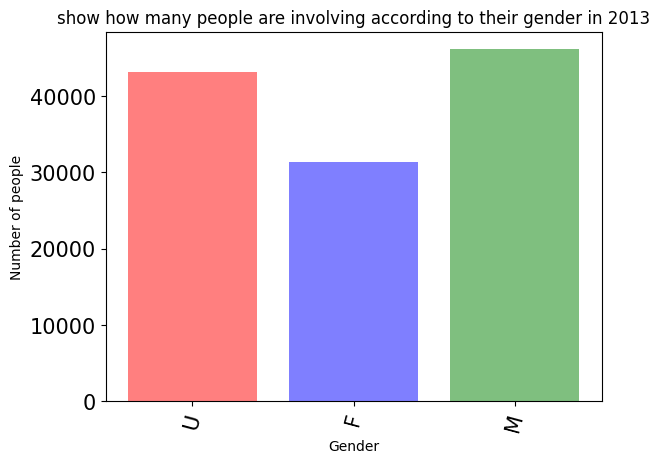

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Query 1 visualization code
q1_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-2.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green'))
plt.ylabel('Number of people')
plt.xlabel('Gender')
plt.title('show how many people are involving according to their gender in 2013')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

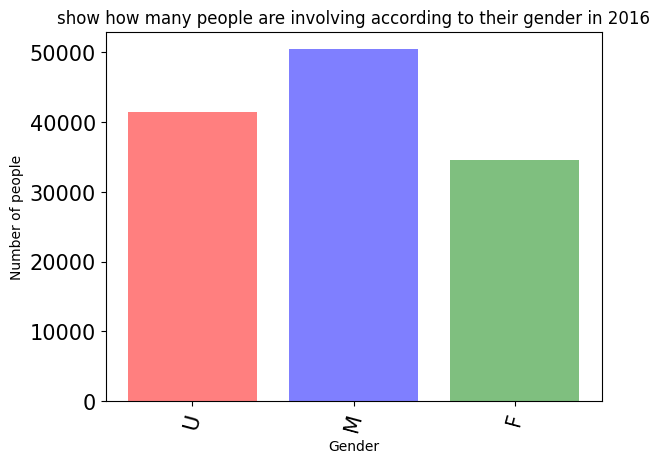

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Query 1 visualization code
q1_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-3.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green'))
plt.ylabel('Number of people')
plt.xlabel('Gender')
plt.title('show how many people are involving according to their gender in 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
query3 = sqlContext.sql("select Reported_year, Sex, Involvement, count(*) as count, Zip_Code from kccrimes where Sex RLIKE 'M|F|U' and Reported_year = '2016' and Involvement = 'ARR' and Zip_Code = '64112' group by Reported_year, Sex, Involvement, Zip_Code")
query3.show()

+-------------+---+-----------+-----+--------+
|Reported_year|Sex|Involvement|count|Zip_Code|
+-------------+---+-----------+-----+--------+
|         2016|  F|        ARR|   39| 64112.0|
|         2016|  M|        ARR|   85| 64112.0|
+-------------+---+-----------+-----+--------+



In [ ]:
#Save the output in csv file
query3.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-4.csv')

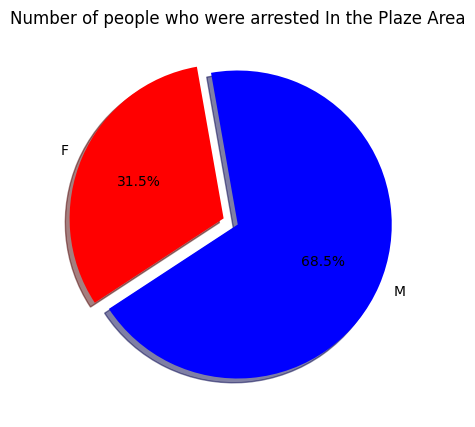

In [ ]:
#Query 3 visualization code
q3_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-4.csv')
plt.figure(figsize=(5, 5))
account_type = q3_data["Sex"]
tweetsNumber = q3_data["count"]
colors = ['red', 'blue']
explode = (0.1, 0)  
plt.pie(tweetsNumber, labels=account_type, explode = explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)
plt.title("Number of people who were arrested In the Plaze Area")
plt.show()

In [ ]:
query4 = sqlContext.sql("select Reported_year, Sex, Involvement, count(*) as count from kccrimes where Sex RLIKE 'M|F|U' and Reported_year = '2016' and Involvement = 'VIC' group by Reported_year, Sex, Involvement")
query4.show()

+-------------+---+-----------+-----+
|Reported_year|Sex|Involvement|count|
+-------------+---+-----------+-----+
|         2016|  U|        VIC|18709|
|         2016|  M|        VIC|22070|
|         2016|  F|        VIC|24482|
+-------------+---+-----------+-----+



In [ ]:
#Save the output in csv file
query4.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-5.csv')

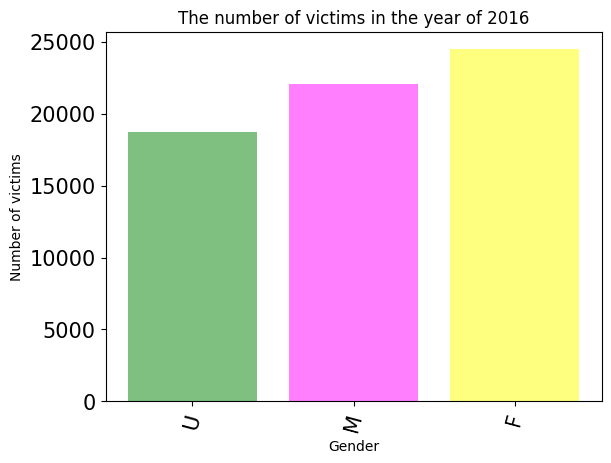

In [ ]:
q1_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-5.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('green', 'magenta', 'yellow'))
plt.ylabel('Number of victims')
plt.xlabel('Gender')
plt.title('The number of victims in the year of 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#suspicious
query5 = sqlContext.sql("select Race, count(*) as count, Involvement from kccrimes where Race RLIKE 'B|I|W' and Involvement = 'SUS' group by Race, Involvement")
query5.show()

+----+------+-----------+
|Race| count|Involvement|
+----+------+-----------+
|   W| 63712|        SUS|
|   B|135642|        SUS|
|   I|   154|        SUS|
+----+------+-----------+



In [ ]:
#Save the output in csv file
query5.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-6.csv')

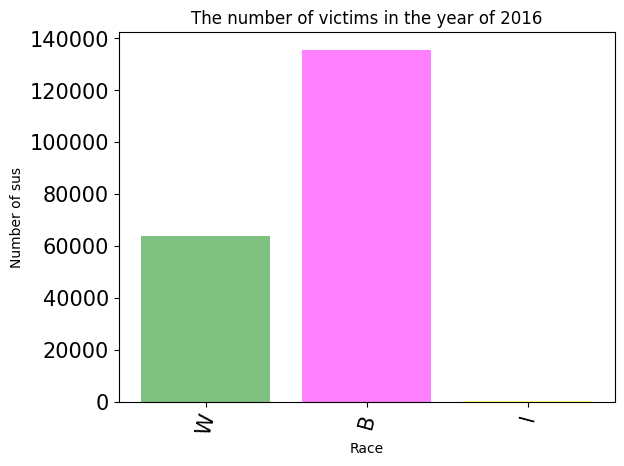

In [ ]:
q1_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-6.csv')

plt.bar(q1_data['Race'],q1_data['count'], alpha=0.5,color=('green', 'magenta', 'yellow'))
plt.ylabel('Number of sus')
plt.xlabel('Race')
plt.title('The number of victims in the year of 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
query6 = KCDPFinal.groupBy("Sex").count()
query6.show()

+---+------+
|Sex| count|
+---+------+
|  F|297290|
|  M|436922|
|  U|387362|
+---+------+



In [ ]:
#Save the output in csv file
query6.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-7.csv')

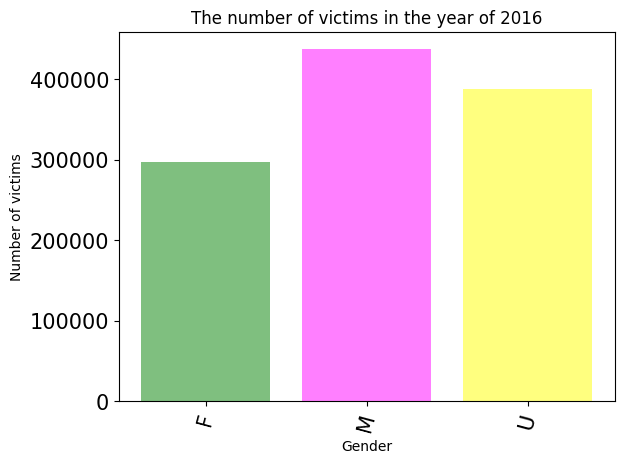

In [ ]:
q1_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-7.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('green', 'magenta', 'yellow'))
plt.ylabel('Number of victims')
plt.xlabel('Gender')
plt.title('The number of victims in the year of 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
query7 = sqlContext.sql("select Reported_year, count(*) as count from kccrimes group by Reported_year")
query7.show()

+-------------+------+
|Reported_year| count|
+-------------+------+
|         2015|120496|
|         2013|120652|
|         2014|119567|
|         2012|125710|
|         2016|126467|
|         2010|130407|
|         2011|123523|
|         2017|129287|
|         2018|125465|
+-------------+------+



In [ ]:
#Save the output in csv file
query7.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-8.csv')

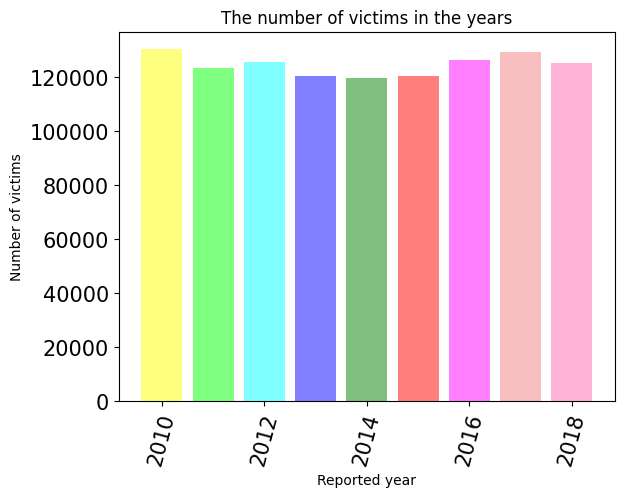

In [ ]:
q1_data = pd.read_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-8.csv')

plt.bar(q1_data['Reported_year'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'lime', 'lightcoral','hotpink','skyblue'))
plt.ylabel('Number of victims')
plt.xlabel('Reported year')
plt.title('The number of victims in the years')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
query8 = sqlContext.sql("select Sex, Description, count(*) as count from kccrimes where Sex = 'F' group by Sex, Description")
query8.show()

+---+--------------------+-----+
|Sex|         Description|count|
+---+--------------------+-----+
|  F|  DISORDERLY CONDUCT|    1|
|  F|     non agg assault|    1|
|  F|  Passing Bad Checks|   75|
|  F|      Counterfeiting|  162|
|  F|            misc Inv|    1|
|  F|         Pornography|   66|
|  F|   offensive contact|    1|
|  F|        embezzlement|    1|
|  F|             IDTheft|    1|
|  F|Sex Off Fondle - mol| 1255|
|  F|Hacking/Computer Inv|   44|
|  F|Sex Off Indecent Con|  279|
|  F|Negligent Manslaught|    2|
|  F|       stealing-bldg|    1|
|  F|         Trespassing| 3938|
|  F|  Stealing All Other| 9515|
|  F|     Steal from Auto|    1|
|  F|        Burg Res Occ|    1|
|  F|Aggravated Assault (|13935|
|  F|                   \|    2|
+---+--------------------+-----+
only showing top 20 rows



In [ ]:
#Save the output in csv file
query8.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-9.csv')

In [ ]:
import re
crime_list = []

for k in query8.select("description").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.description)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

163


In [ ]:
query9 = sqlContext.sql("select Sex, Description, count(*) as count from kccrimes where Age < '18' and Involvement = 'VIC' group by Sex, Description")
query9.show()

+---+--------------------+-----+
|Sex|         Description|count|
+---+--------------------+-----+
|  M|  Stealing All Other|  182|
|  M|Sex Off Indecent Con|   15|
|  F|  Passing Bad Checks|    1|
|  F|         Pornography|   11|
|  M|Hit and Run of a Per|    3|
|  M|Sex Off Fondle - mol|   67|
|  U|Agg Assault - Drive-|    1|
|  F|Sex Off Fondle - mol|  332|
|  F|Sex Off Indecent Con|   43|
|  F|Negligent Manslaught|    2|
|  F|         Trespassing|    9|
|  F|  Stealing All Other|  168|
|  M|Credit/Debit/ATM Car|    8|
|  M|Stealing Shoplifting|    7|
|  F|Aggravated Assault (|  854|
|  F|Possession of Drug E|    9|
|  M|               Arson|   13|
|  F| Sexual Assault with|    2|
|  M|  child endangerment|    4|
|  M|Stealing from Buildi|  180|
+---+--------------------+-----+
only showing top 20 rows



In [ ]:
#Save the output in csv file
query9.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-10.csv')

In [ ]:
import re
crime_list = []

for k in query9.select("description").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.description)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

146


In [ ]:
query10 = sqlContext.sql("select y.yr, y.dsc, MAX(y.num) from (select Reported_year as yr, Description as dsc, count(*) as num from kccrimes group by Reported_year, Description) y group by y.yr, y.dsc")
query10.show()

+----+--------------------+--------+
|  yr|                 dsc|max(num)|
+----+--------------------+--------+
|2010|  Strong Arm Robbery|    1542|
|2011|Promoting Prostituti|      31|
|2013|         Drunkenness|     156|
|2013|            misc Inv|       1|
|2016| Sexual Assault with|       6|
|2010|     Forcible Sodomy|     324|
|2011|             Forgery|     645|
|2013|Sex Off Fondle - mol|     247|
|2013|Violation Ex Parte O|     245|
|2014|Possession/Sale/Dist|    4704|
|2011|Accidental Drug Over|       3|
|2012|  Stealing All Other|    5347|
|2013|Missing/Runaway Juve|       2|
|2016|      Statutory Rape|      60|
|2016|Sex Off Follow/Entic|      12|
|2011|       Impersonation|    1313|
|2016|Resisting an Officer|    1551|
|2016| Stealing Pickpocket|     109|
|2010|           littering|       2|
|2015|   Intimidation (DV)|       2|
+----+--------------------+--------+
only showing top 20 rows



In [ ]:
#Save the output in csv file
query10.toPandas().to_csv('/content/drive/MyDrive/DBMS_project_final/Source Code/3- Data Analysis/Spark/query-11.csv')

In [ ]:
import re
crime_list = []

for k in query10.select("dsc").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.dsc)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

952
